# Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [21]:
LABELED_PATH = 'data/labels.parquet'
PREDICTED_XGB_PATH = 'data/results/xgb_predictions.parquet'
PREDICTED_RF_PATH = 'data/results/rf_predictions.parquet'
PREDICTED_RIDGE_PATH = 'data/results/ridge_test_predictions.parquet'
TEST_START_DATE = '2023-04-01'
TEST_START_DATE_BASE_LINE = '2023-03-25'
HIGH_DEMAND_NUMS = 16
MID_DEMAND_NUMS = 33
# SAVE_PLOT_PATH = 'data/pngs/'
warnings.filterwarnings('ignore')

In [22]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None
        }
    },
       
}

In [23]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None
}

In [24]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None
}

In [25]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_rf':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_ridge':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_voting':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [26]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(31440, 3)


Location       Date  Demand
0         1 2023-01-01    40.0
1         1 2023-01-02    31.0
2         1 2023-01-03    27.0
3         1 2023-01-04     7.0
4         1 2023-01-05    15.0

In [27]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(7860, 3)


Location       Date  Demand
0         1 2023-04-01    13.0
1         1 2023-04-02    17.0
2         1 2023-04-03     9.0
3         1 2023-04-04    12.0
4         1 2023-04-05    18.0

## Load Predicted Data

In [28]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         17.433596
1         1 2023-04-02         15.451467
2         1 2023-04-03         12.600250
3         1 2023-04-04          9.332970
4         1 2023-04-05         11.754244

In [29]:
predictions_dict['model_ridge'] = pd.read_parquet(PREDICTED_RIDGE_PATH)
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.058503
1         1 2023-04-02         19.940854
2         1 2023-04-03         10.172899
3         1 2023-04-04         10.371798
4         1 2023-04-05          9.977403

In [30]:
predictions_dict['model_rf'] = pd.read_parquet(PREDICTED_RF_PATH)
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         12.382074
1         1 2023-04-02         13.698427
2         1 2023-04-03         10.275906
3         1 2023-04-04         10.065382
4         1 2023-04-05         11.226349

In [31]:
pd.concat(
    [predictions_dict['model_rf']['Predicted_demand'],
    predictions_dict['model_ridge']['Predicted_demand'],
    predictions_dict['model_xgboost']['Predicted_demand']], axis = 1
    )

Predicted_demand  Predicted_demand  Predicted_demand
0            12.382074         16.058503         17.433596
1            13.698427         19.940854         15.451467
2            10.275906         10.172899         12.600250
3            10.065382         10.371798          9.332970
4            11.226349          9.977403         11.754244
...                ...               ...               ...
7855         53.708392         50.506521         55.120136
7856         68.746175         73.971461         70.979408
7857         59.053000         50.988221         57.081707
7858         65.037512         60.896849         65.534142
7859         67.043702         75.897825         66.433052

[7860 rows x 3 columns]

### BaseLine Models

In [32]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [33]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE_BASE_LINE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()

(9694, 3)


Location       Date  Demand
0         1 2023-03-25    15.0
1         1 2023-03-26    14.0
2         1 2023-03-27     3.0
3         1 2023-03-28    14.0
4         1 2023-03-29     7.0

In [34]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7860, 3)


Location       Date  Predicted_demand
7          1 2023-04-01              15.0
8          1 2023-04-02              14.0
9          1 2023-04-03               3.0
10         1 2023-04-04              14.0
11         1 2023-04-05               7.0

### Join Predictions and Actual

In [35]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [36]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0              15.0            5
1         1 2023-04-02    17.0              14.0            6
2         1 2023-04-03     9.0               3.0            0
3         1 2023-04-04    12.0              14.0            1
4         1 2023-04-05    18.0               7.0            2

In [37]:
predictions_dict['model_ridge'] = join_actual_predict(test_df,predictions_dict['model_ridge'])
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         16.058503            5
1         1 2023-04-02    17.0         19.940854            6
2         1 2023-04-03     9.0         10.172899            0
3         1 2023-04-04    12.0         10.371798            1
4         1 2023-04-05    18.0          9.977403            2

In [38]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         17.433596            5
1         1 2023-04-02    17.0         15.451467            6
2         1 2023-04-03     9.0         12.600250            0
3         1 2023-04-04    12.0          9.332970            1
4         1 2023-04-05    18.0         11.754244            2

In [39]:
predictions_dict['model_rf'] = join_actual_predict(test_df,predictions_dict['model_rf'])
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         12.382074            5
1         1 2023-04-02    17.0         13.698427            6
2         1 2023-04-03     9.0         10.275906            0
3         1 2023-04-04    12.0         10.065382            1
4         1 2023-04-05    18.0         11.226349            2

### Sort Locations by Demand

In [40]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index

In [41]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

In [42]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

# Mean error Calculation

### Error Columns

In [43]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100

In [44]:
calculate_error(predictions_dict)

In [45]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7860, 8)


Location       Date  Demand  Predicted_demand  day_of_week  error  \
0         1 2023-04-01    13.0              15.0            5    2.0   
1         1 2023-04-02    17.0              14.0            6    3.0   
2         1 2023-04-03     9.0               3.0            0    6.0   
3         1 2023-04-04    12.0              14.0            1    2.0   
4         1 2023-04-05    18.0               7.0            2   11.0   

   squared_error  percentage_error  
0            4.0         15.384615  
1            9.0         17.647059  
2           36.0         66.666667  
3            4.0         16.666667  
4          121.0         61.111111

In [46]:
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 8)


Location       Date  Demand  Predicted_demand  day_of_week     error  \
0         1 2023-04-01    13.0         16.058503            5  3.058503   
1         1 2023-04-02    17.0         19.940854            6  2.940854   
2         1 2023-04-03     9.0         10.172899            0  1.172899   
3         1 2023-04-04    12.0         10.371798            1  1.628202   
4         1 2023-04-05    18.0          9.977403            2  8.022597   

   squared_error  percentage_error  
0       9.354442         23.526948  
1       8.648623         17.299142  
2       1.375693         13.032214  
3       2.651043         13.568353  
4      64.362061         44.569983

### Aggregate Error Columns

In [47]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error',]] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [48]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [49]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].tail()

(30, 5)


Date       mape         mae           mse  demand_mean
25 2023-04-26   4.398497   60.909091   6907.939394  1454.939394
26 2023-04-27   6.542465   82.000000  10987.515152  1538.363636
27 2023-04-28   6.312499   91.060606  12657.181818  1573.242424
28 2023-04-29  12.385915  171.636364  52189.333333  1494.151515
29 2023-04-30  10.071385  108.606061  21214.969697  1203.818182

In [50]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(33, 5)


Location       mape        mae          mse  demand_mean
28       261   9.212664  50.964082  3375.833666   561.000000
29        87   7.924155  45.254678  3516.947422   558.966667
30       125   9.646995  53.990104  4668.811969   552.466667
31       166   9.932997  51.892457  3725.168211   544.433333
32        70  12.460982  61.598861  4877.614743   536.766667

In [51]:
print(predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].tail()

(33, 5)


Location       mape        mae          mse  demand_mean
28       261   8.472046  47.320020  3196.169227   561.000000
29        87   7.456292  41.627744  3060.096445   558.966667
30       125   9.408200  52.322494  4323.157338   552.466667
31       166   9.328598  49.657742  3863.073512   544.433333
32        70  10.223839  51.330069  3656.836173   536.766667

### Plot Mape for Models Predicted Demands

In [52]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


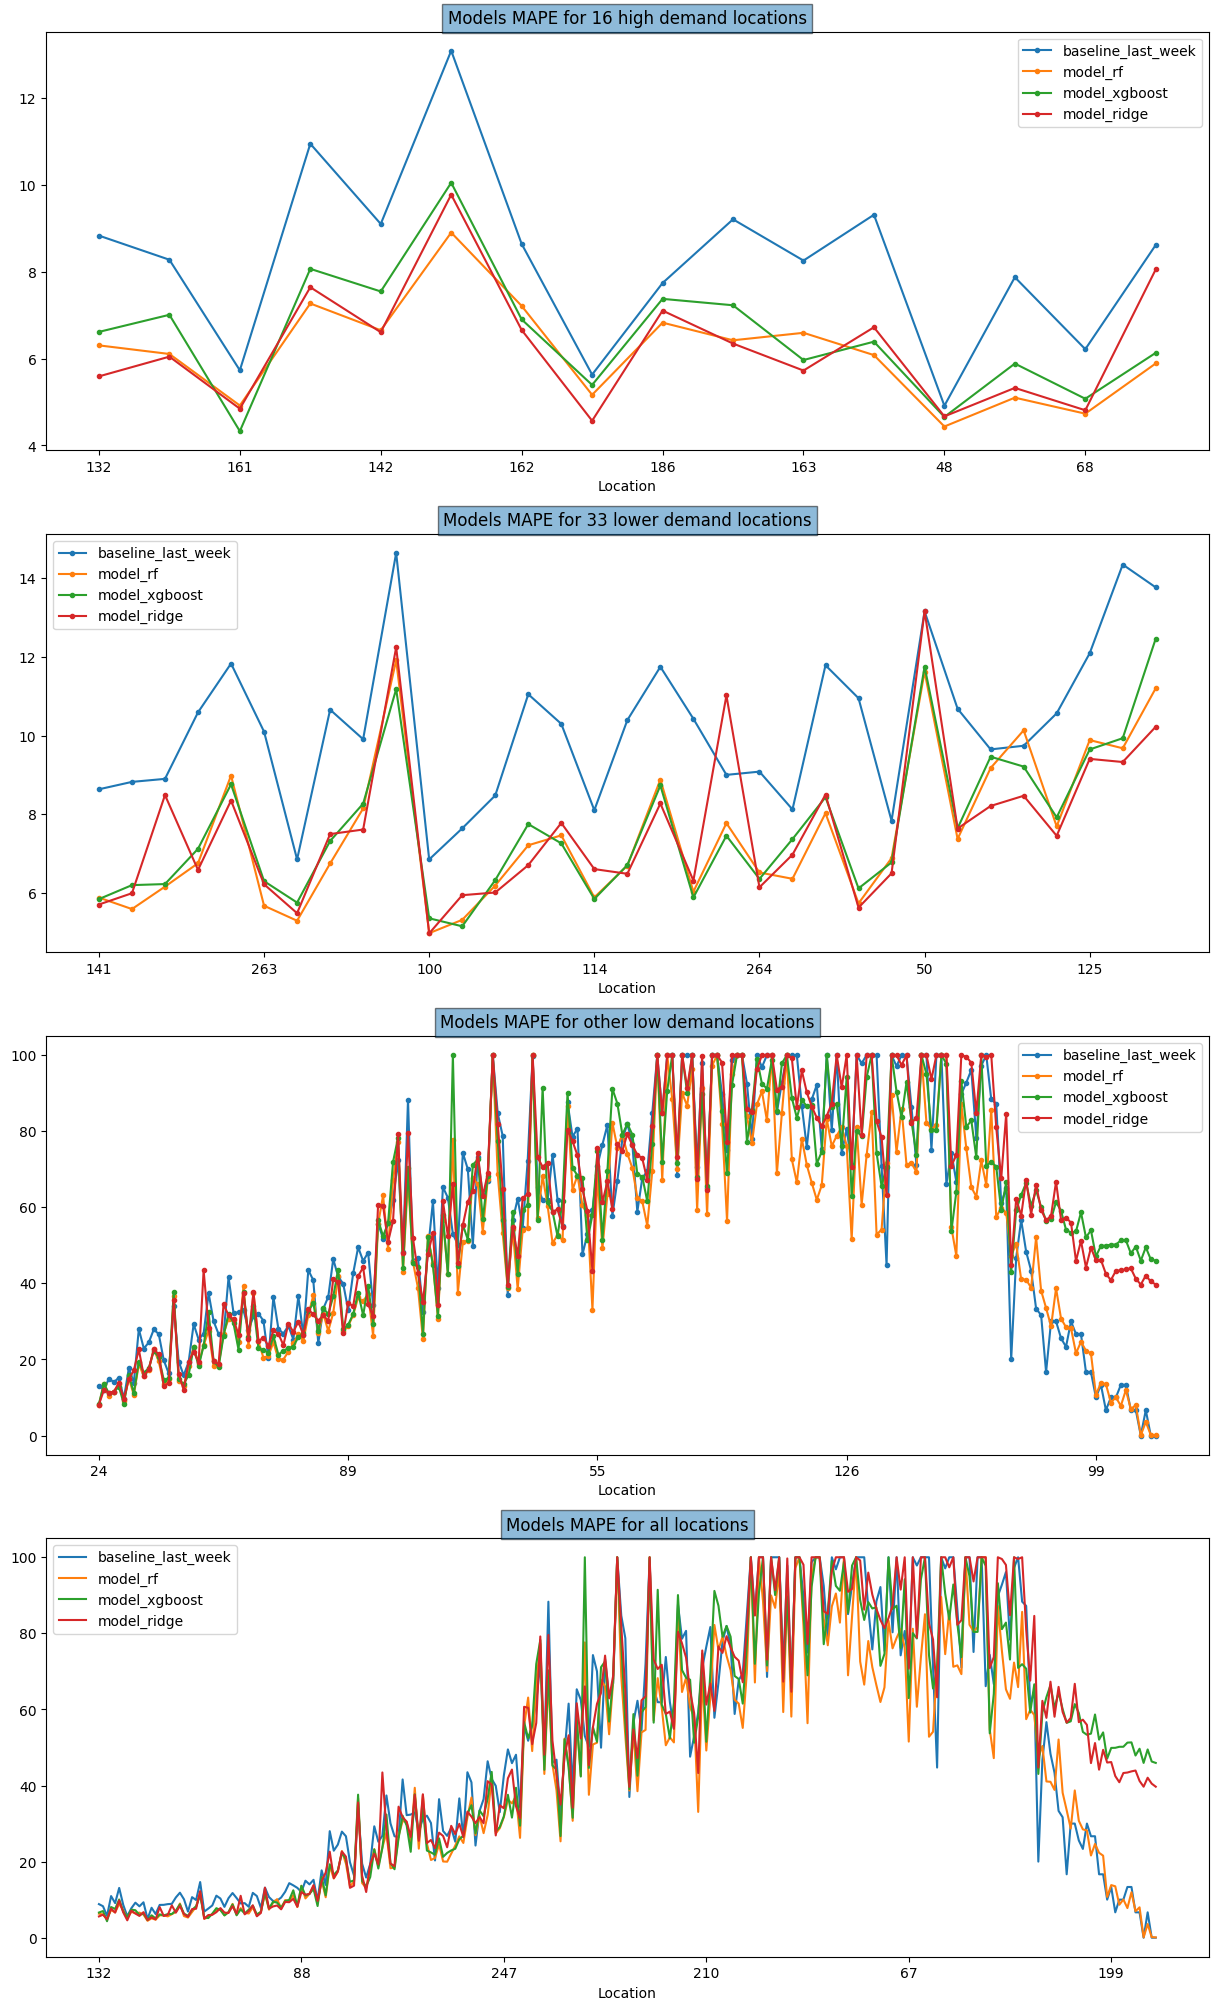

In [53]:
plot_mape(predictions_mean_error_dict, 'Location')

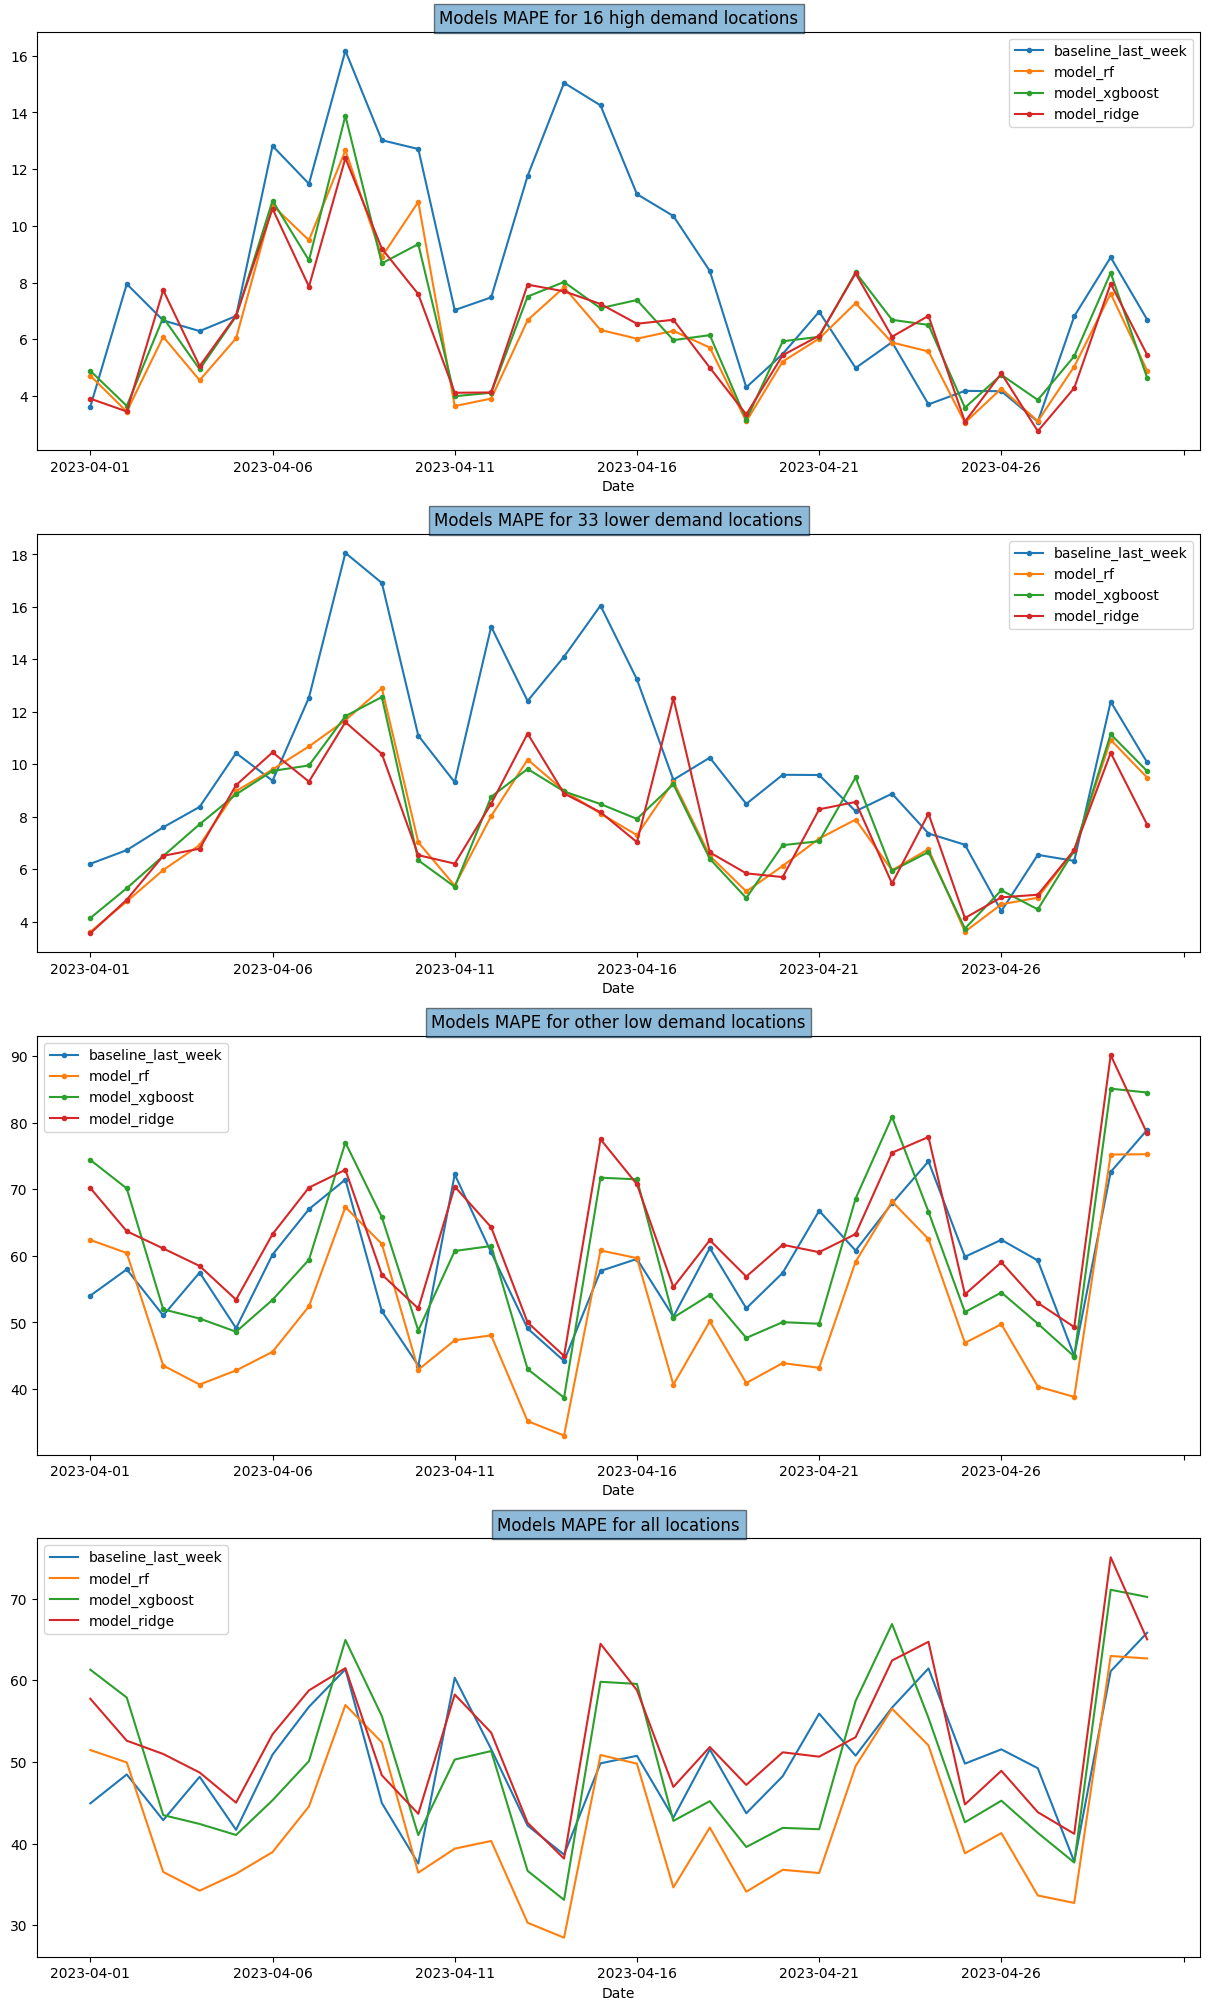

In [54]:
plot_mape(predictions_mean_error_dict, 'Date')

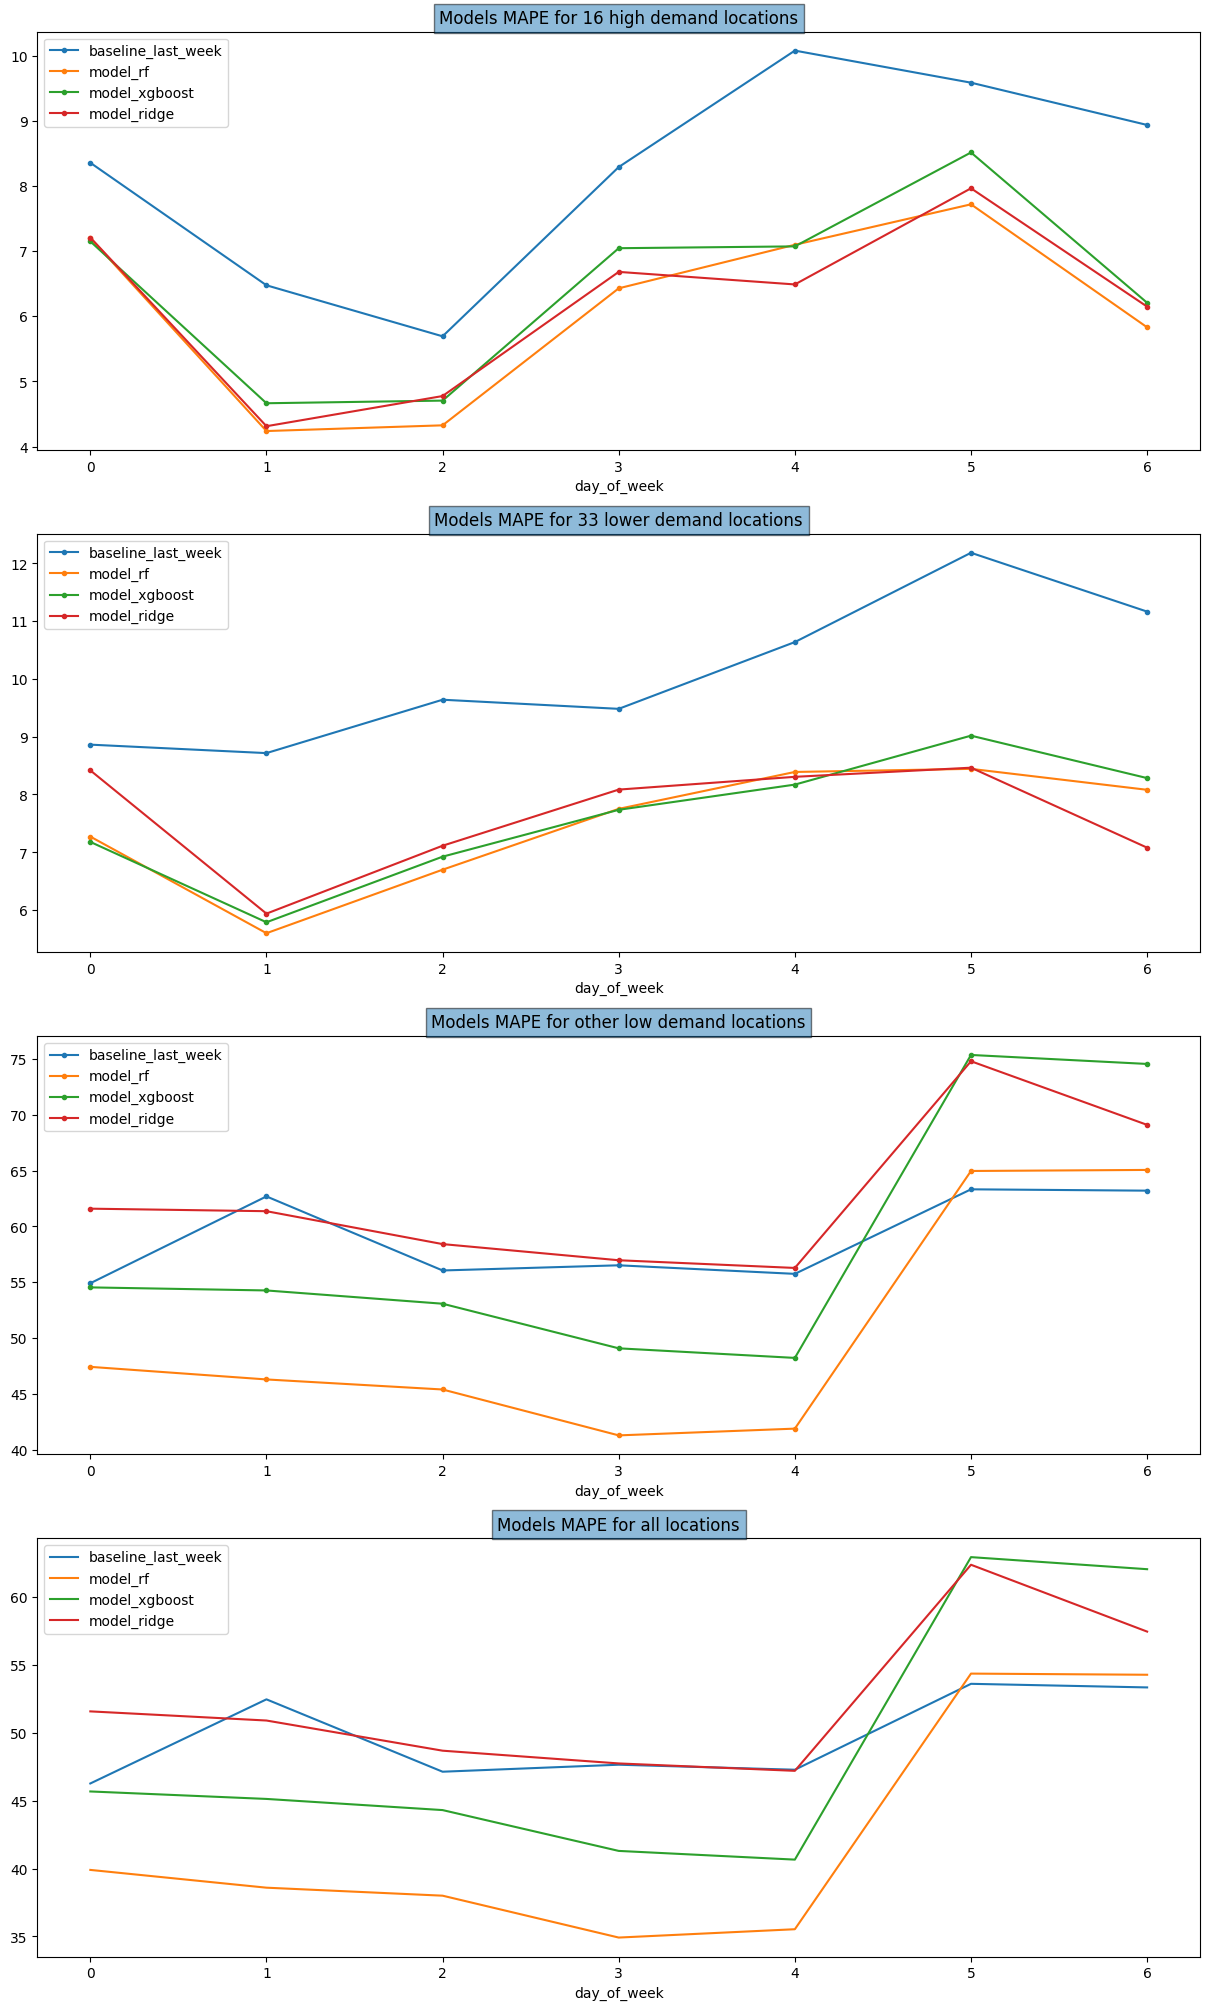

In [55]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [56]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


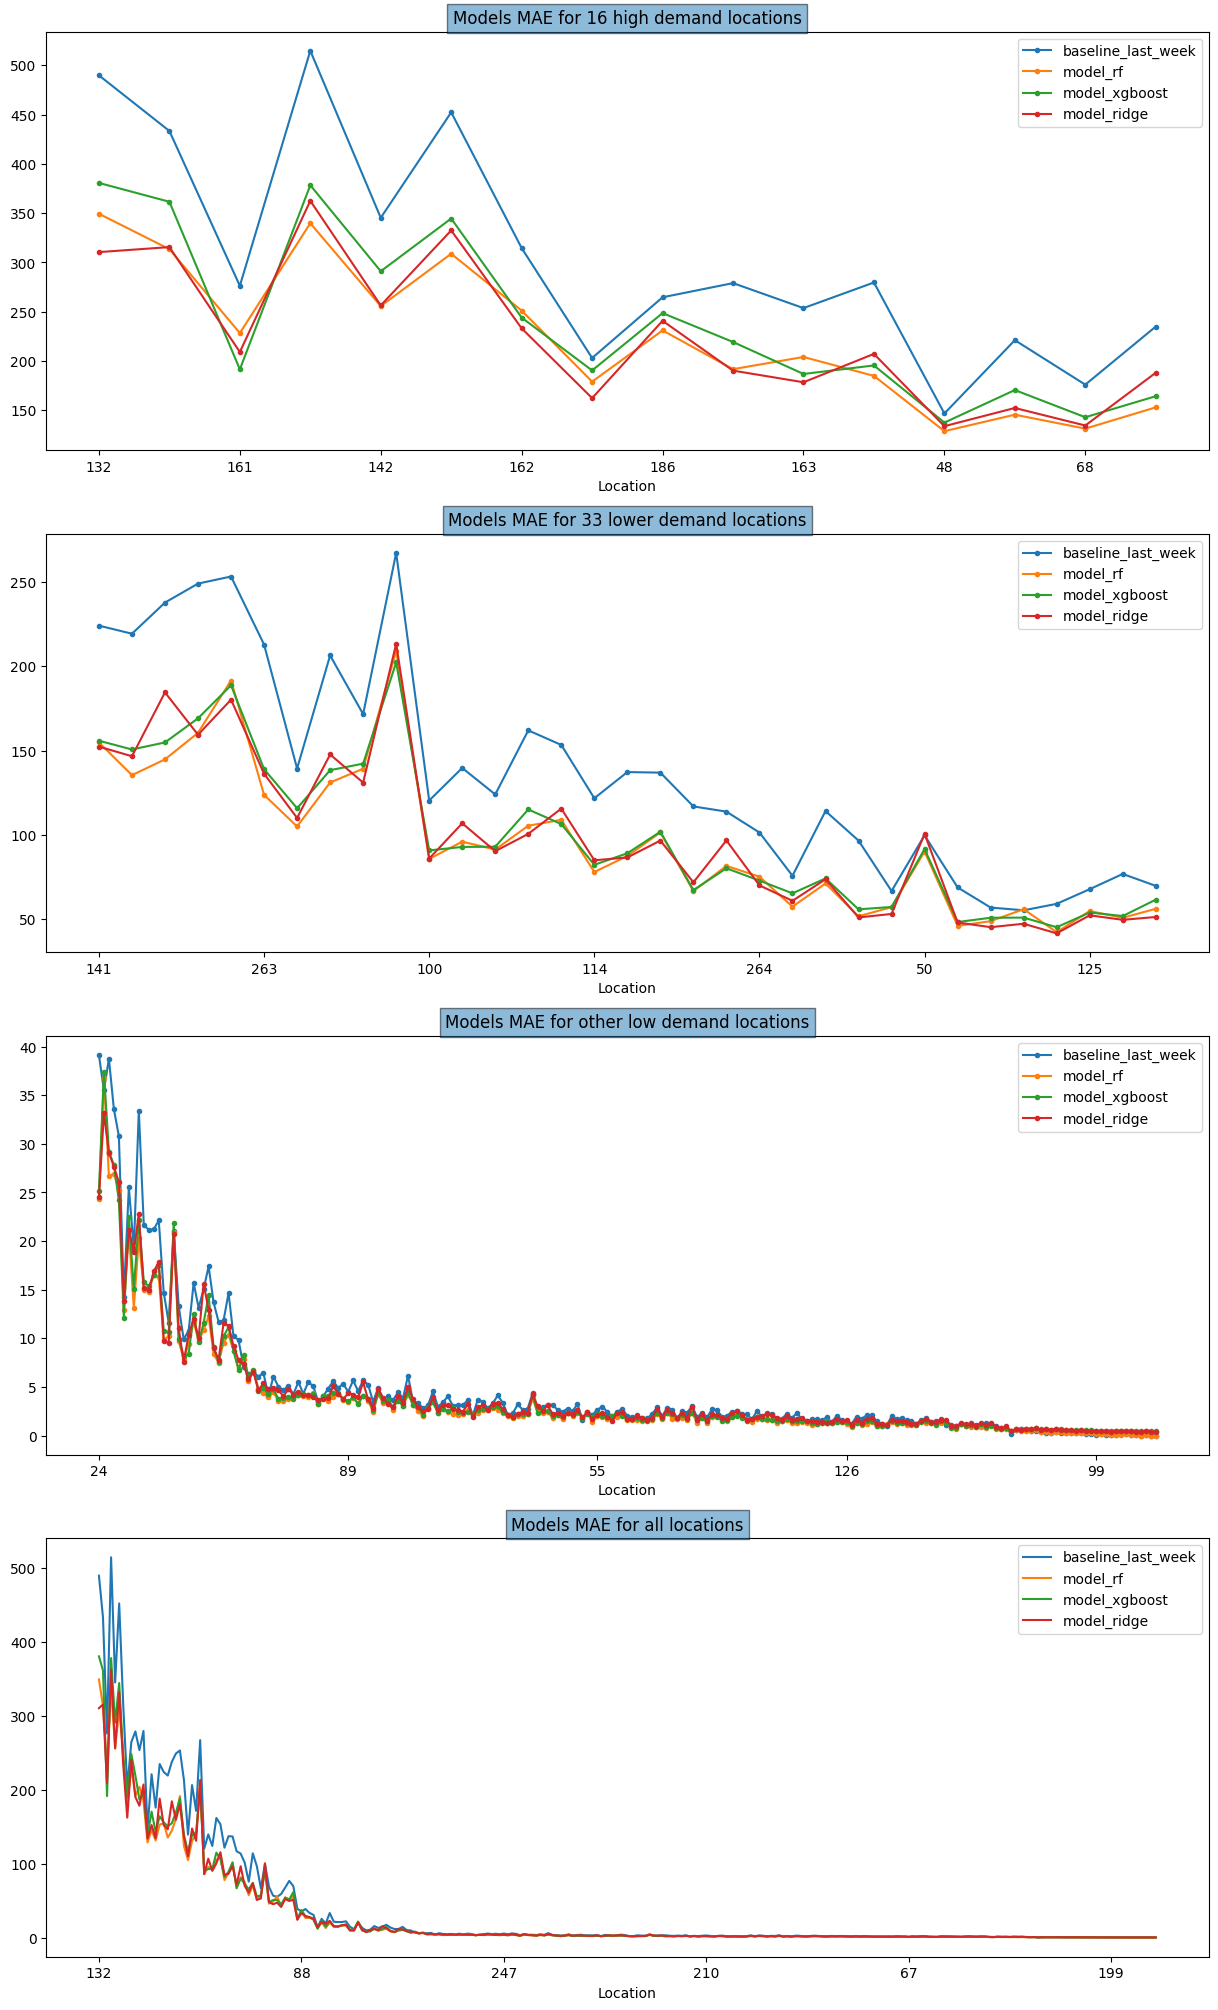

In [57]:
plot_mae(predictions_mean_error_dict, 'Location')

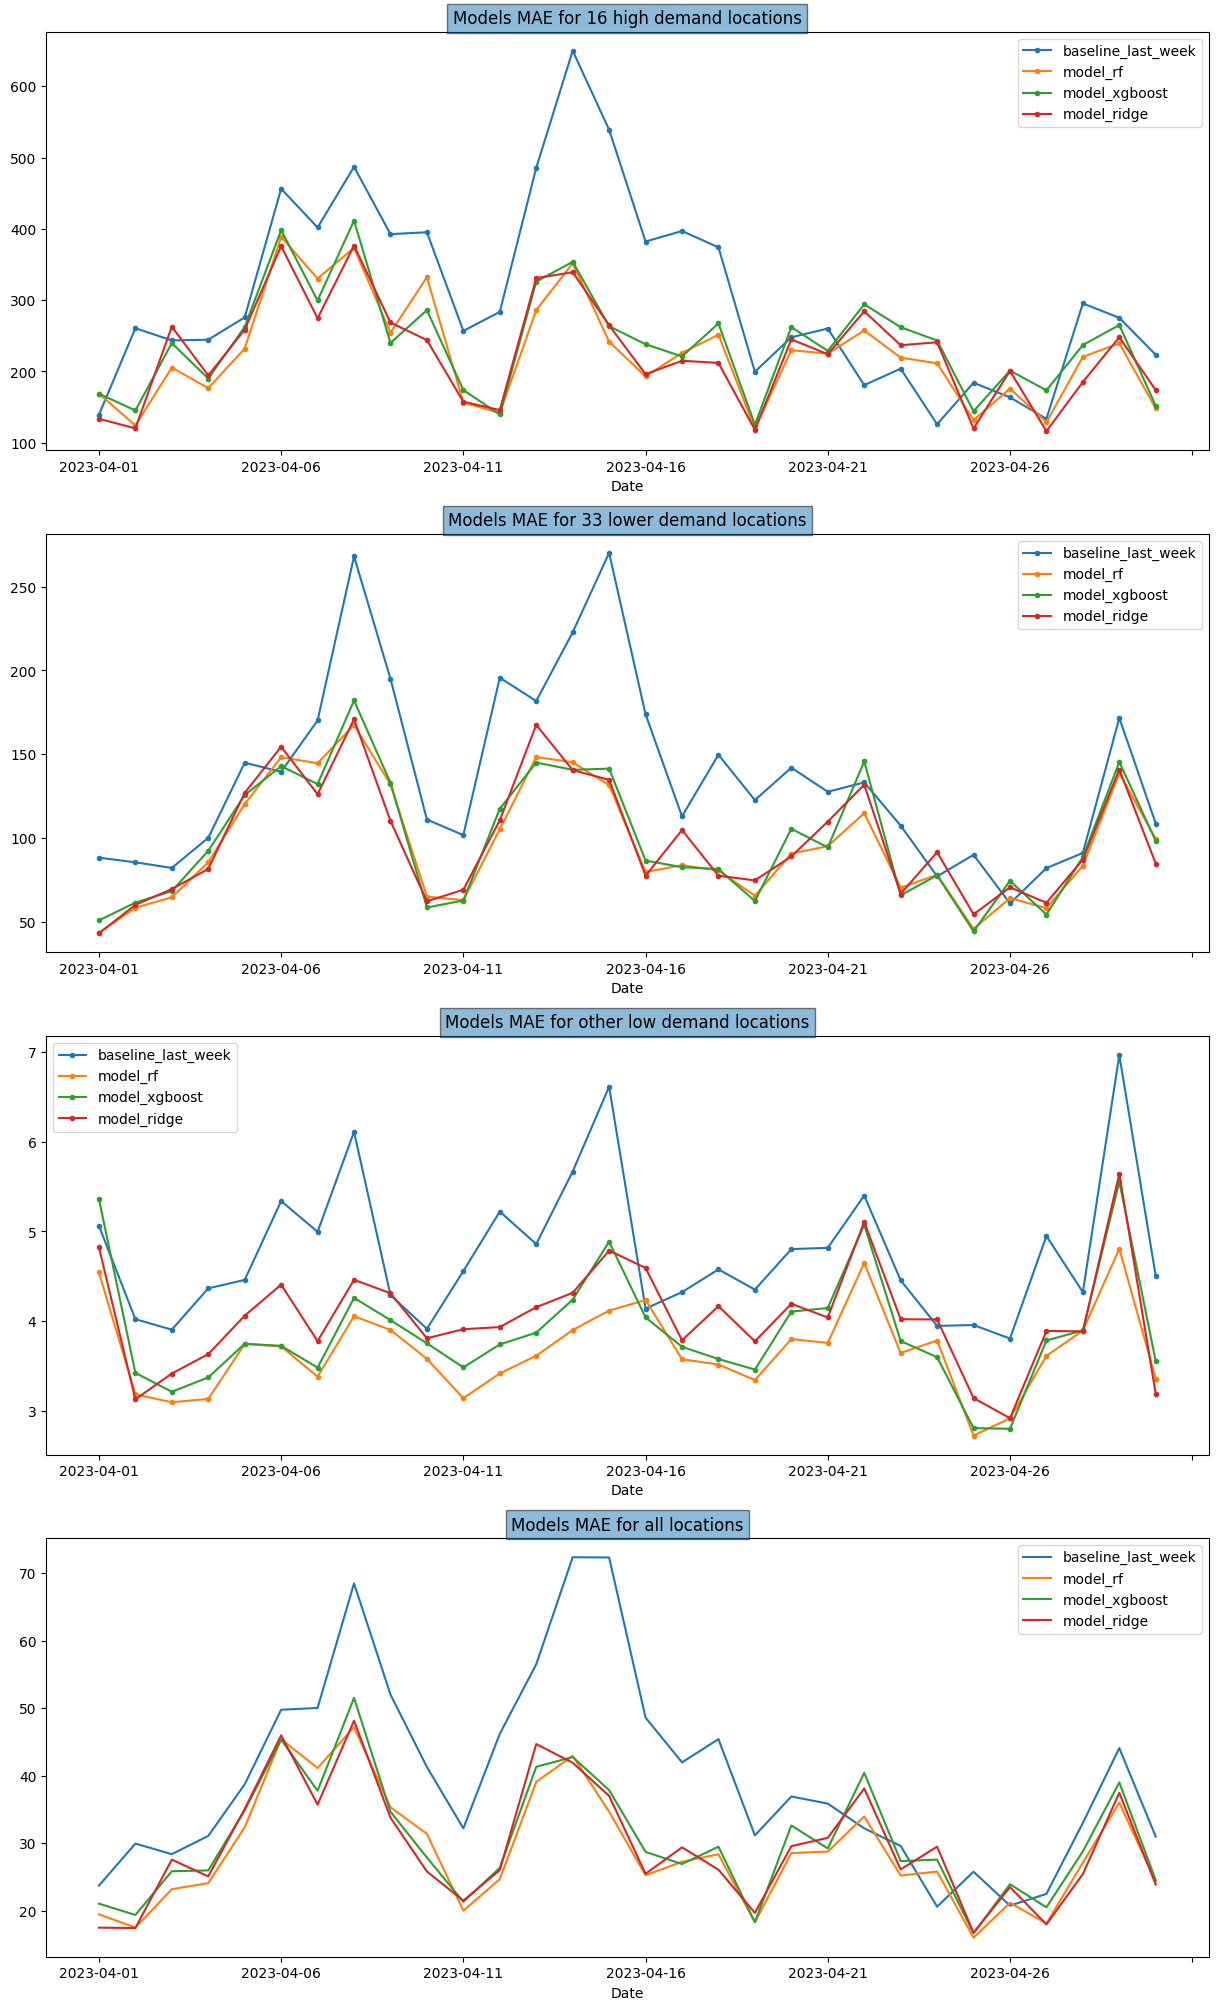

In [58]:
plot_mae(predictions_mean_error_dict, 'Date')

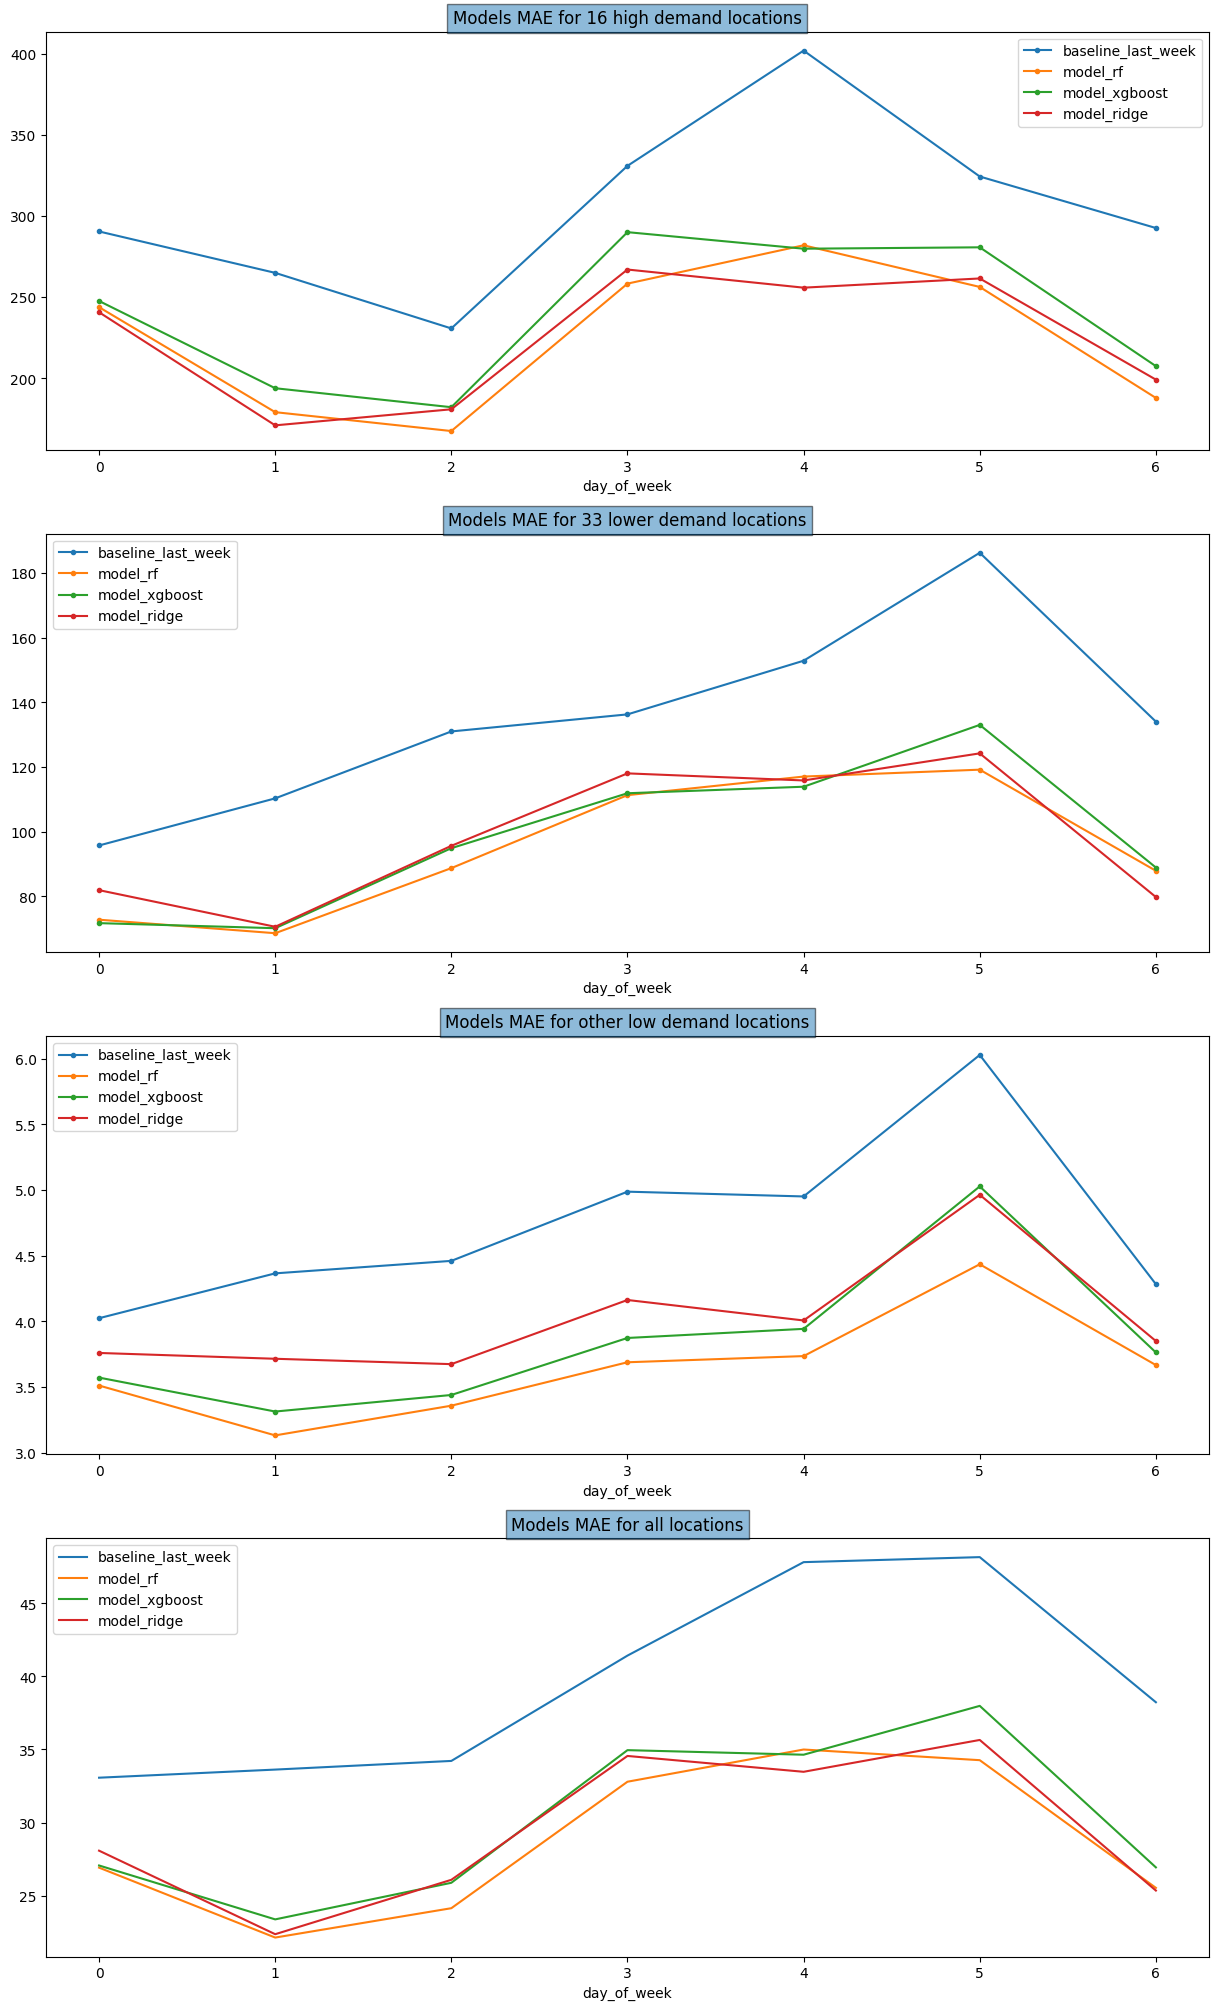

In [59]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [60]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


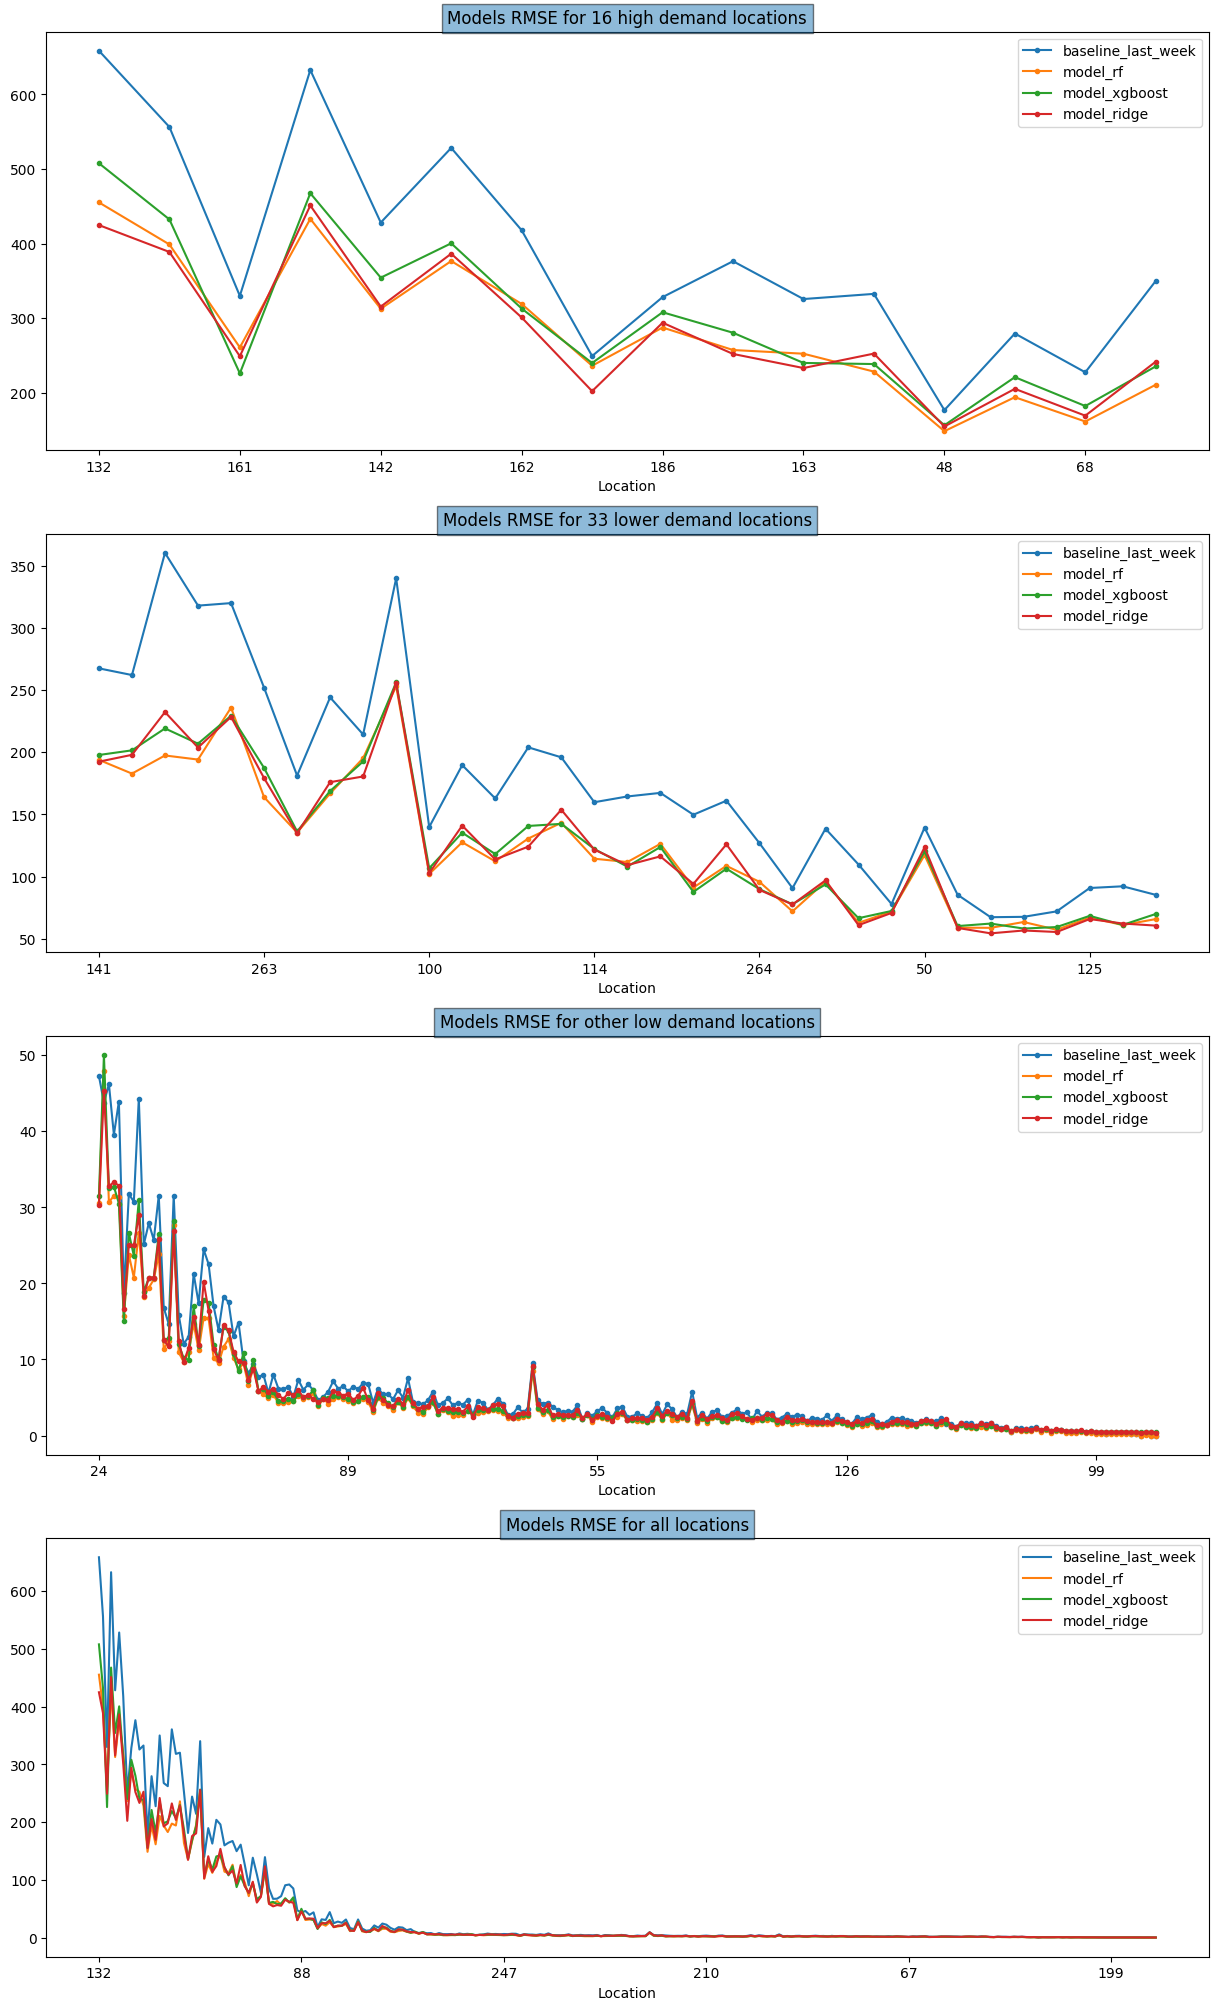

In [61]:
plot_rmse(predictions_mean_error_dict, 'Location')

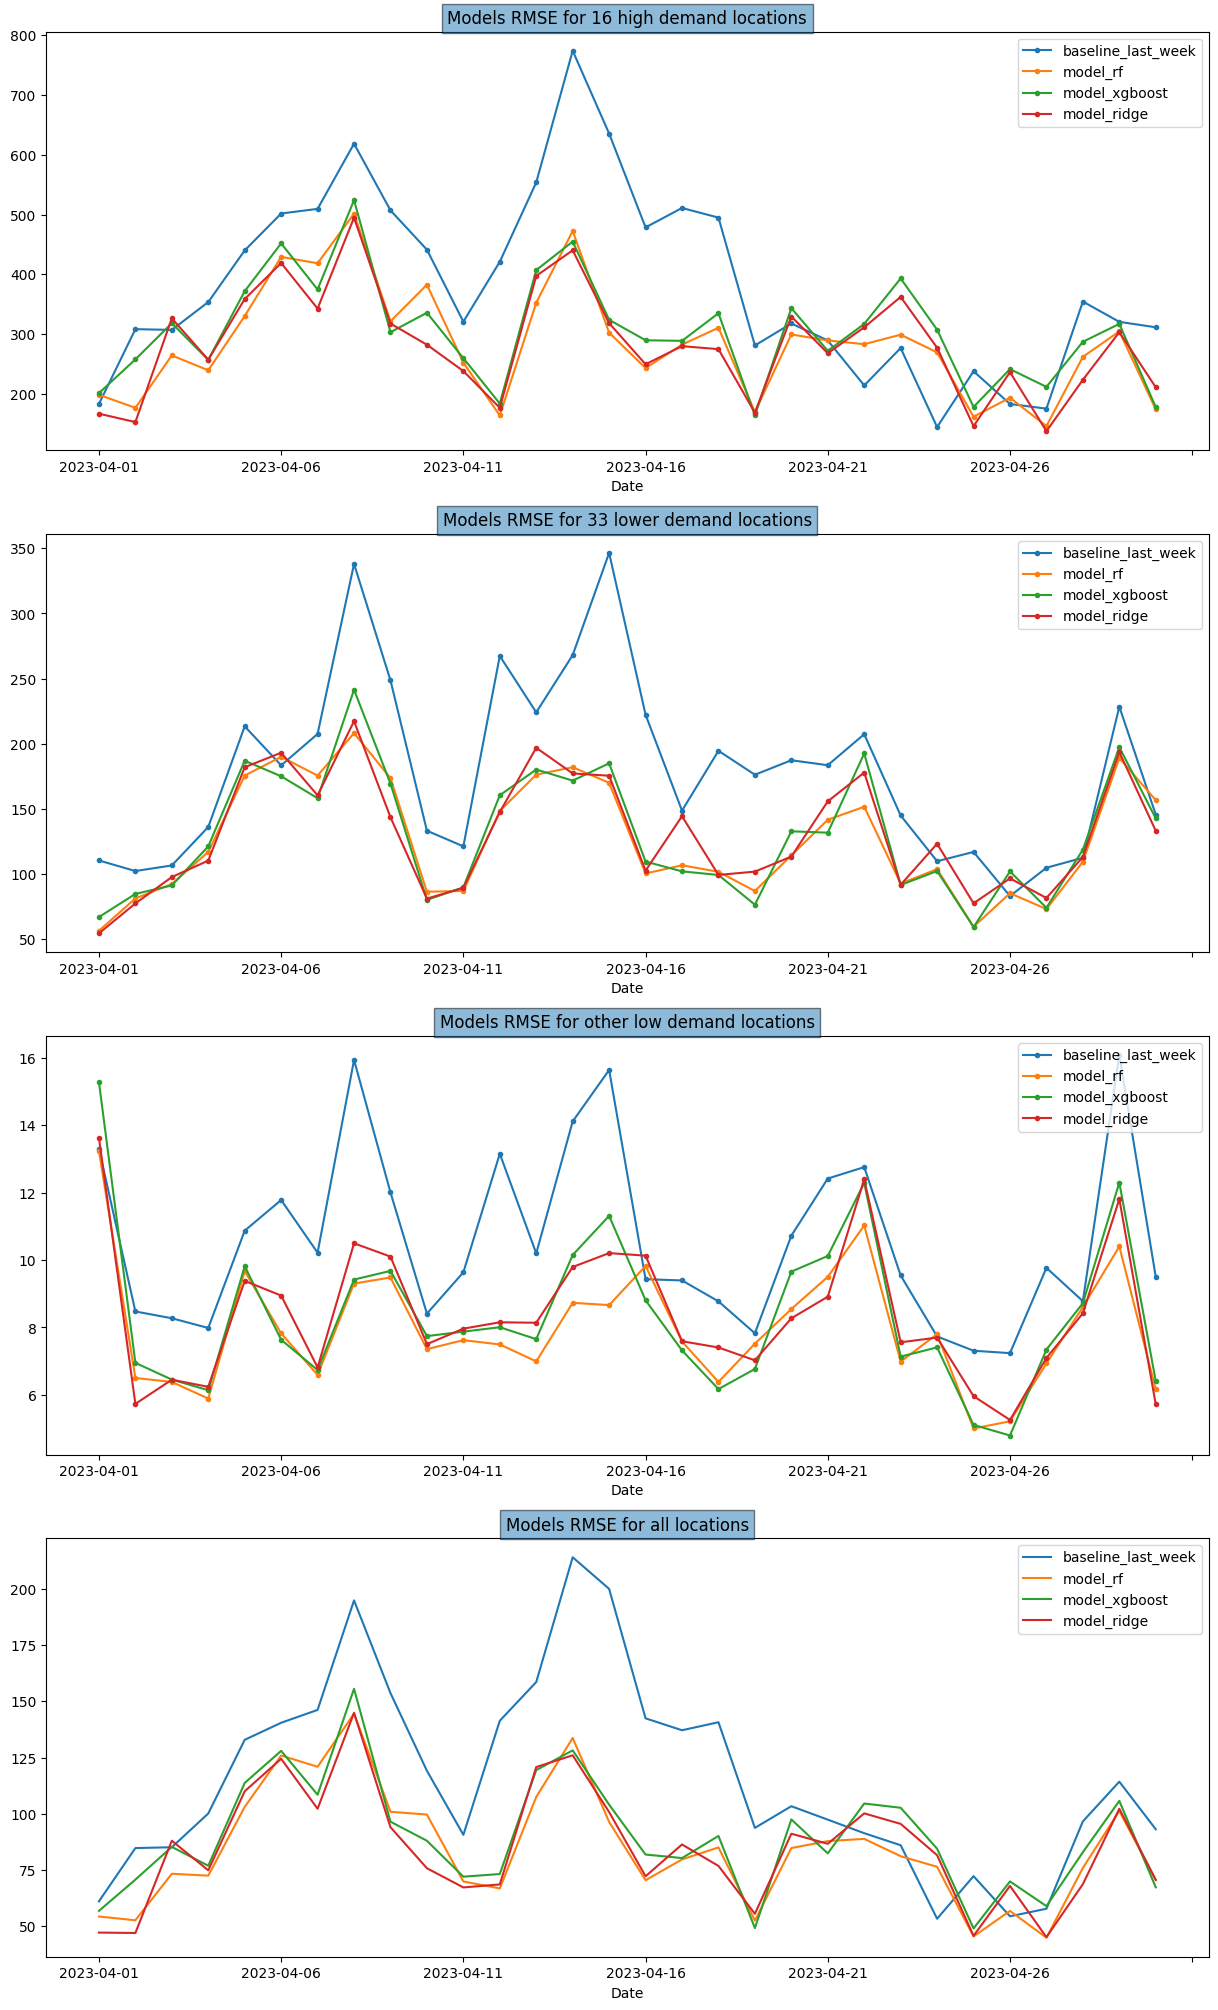

In [62]:
plot_rmse(predictions_mean_error_dict, 'Date')

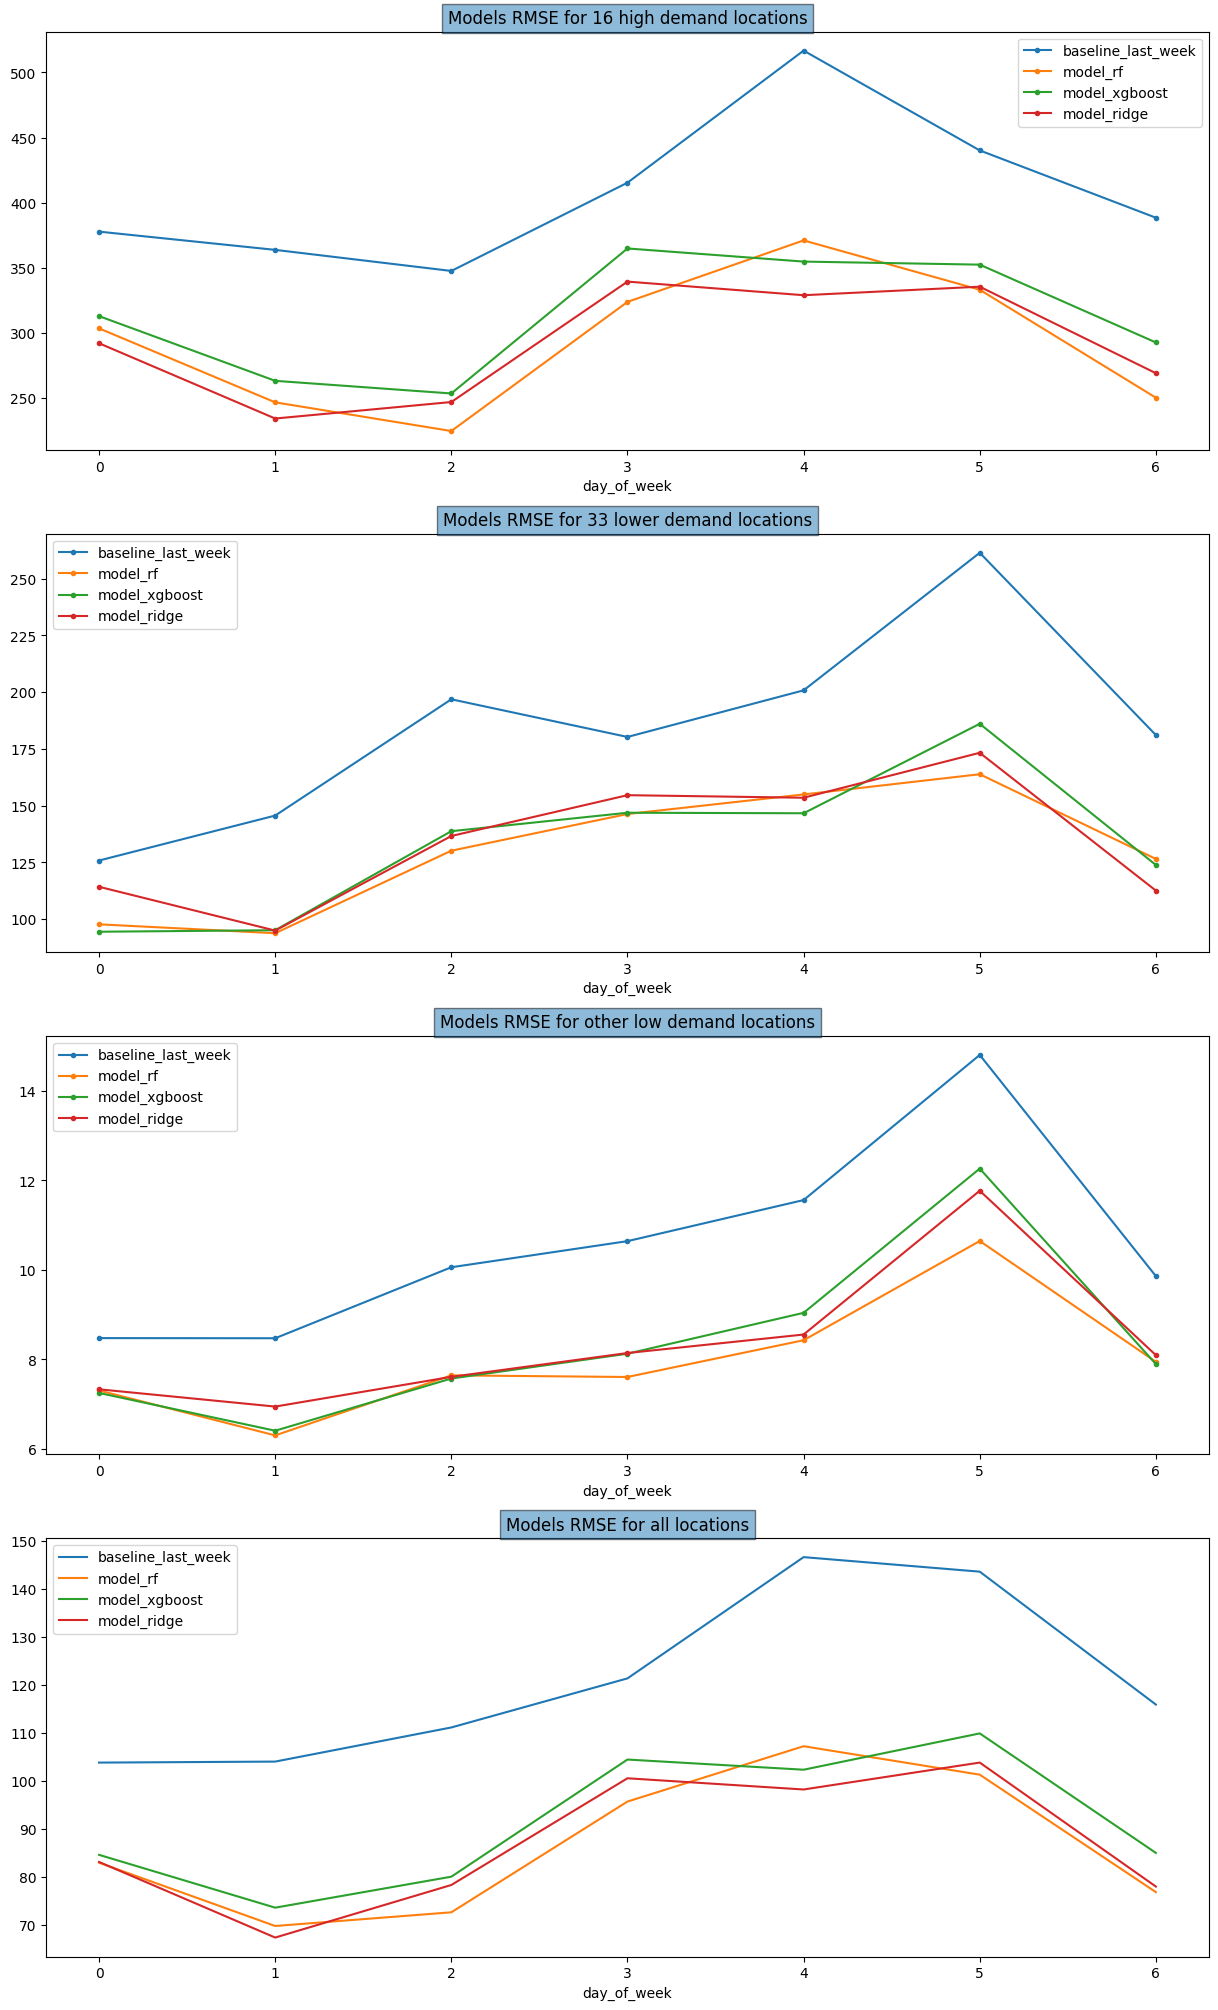

In [63]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [64]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [65]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [66]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))

In [67]:
df.style.format('{:.2f}')